<a href="https://colab.research.google.com/github/benecaio/analiseSinaisPhyton/blob/main/4_TransformadaFourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Sumário

1. [Introdução](#1.-Introdução)
2. [Exemplo](#2.-Exemplo)
3. [Exemplos Python](#3.-Exemplos_Python)

## 1. Introdução

Após os estudos sobre as séries de Fourier, entendemos que em determinados casos, é possível reescrever uma função como a soma de senos e cossenos. Assim, é muito mais fácil e prático analisar seu conteúdo de amplitudes e frequências, uma vez que senos e cossenos são funções com propriedades conhecidas.

Vamos relembrar alguns conceitos.

A soma parcial da série de Fourier de uma função $g(t)$ é dada por 

<p style="text-align:center">$ g_{N}(t) = \displaystyle \sum_{n=-N}^{N} C_{n} e^{2 \pi i n t/T}$, </p>

em que 

<p style="text-align:center">$ C_{n} = \dfrac{1}{T} \displaystyle \int_{-T/2}^{T/2} g(t) e^{-2 \pi n t/T} dt $ </p>

Assim, $g_{N}(t)$ se aproxima de $g(t)$ quando $N \implies \infty$.

**Espectro de frequência**: é o conjunto formado por todos os pares $(W_{n}, |C_{n}|)$, em que $W_{n}$ é a frequência de $g(t)$ em um determinado $n$.

Seja $f(t)$ uma função periódica de período $T$ seccionalmente contínua. Sua série de Fourier é dada por 

<p style="text-align:center">$ f_{N}(t) = \displaystyle \sum_{n=-\infty}^{\infty} e^{2 \pi n t/T} \left( \dfrac{1}{T} \int_{-T/2}^{T/2} f(\zeta) e^{-i 2 \pi n \zeta / T} d\zeta \right) $ </p>

Chame $\Delta \omega = \dfrac{2/pi}{T}$, então $T = \dfrac{2 \pi}{\Delta \omega}$; $\Delta n = \dfrac{2\pi n}{T} = \Delta \omega \cdot n$

Assim, 

<p style="text-align:center">$ f_{N}(t) = \displaystyle \sum_{n=-\infty}^{\infty} e^{i \omega n t} \left( \dfrac{\Delta \omega}{2 \pi} \int_{-\pi/\Delta \omega}^{\pi/\Delta \omega} f(\zeta) e^{-i \omega n \zeta} d\zeta \right) $ </p>

Chame $\int_{-\pi/\Delta \omega}^{\pi/\Delta \omega} f(\zeta) e^{-i \omega n \zeta} d\zeta  = \hat{f}(\omega_{n})$

<p style="text-align:center">$ f(t) = \dfrac{1}{2 \pi} \displaystyle \sum_{n=-\infty}^{\infty} e^{i \omega n t} \hat{f}(\omega_{n}) \Delta \omega $ </p>

******

Vamos relembrar a integral de Riemman:

<p style="text-align:center">$ \int_{a}^{b} g(x) dx =  \lim\limits_{N \to \infty, \Delta x \to 0} \displaystyle \sum_{n=0}^{N} g(n \Delta x + a) \Delta x $ </p>

Podemos imaginar que uma função não-periódica é uma função periódica de período $T = \infty$. Ao fazer o limite $T \to \infty$, temos que $\Delta \omega \to 0$.

Logo, 

<p style="text-align:center">$ f(t) = \dfrac{1}{2\pi} \displaystyle \int_{-\infty}^{\infty} e^{i\omega t} \hat{f}(\omega) d\omega $, </p>

operação chamada de inversa da transformada, sendo 

<p style="text-align:center">$ \hat{f}(\omega) = \displaystyle \int_{-\infty}^{\infty} f(t) e^{-i\omega t} dt $, </p>

operação chamada de **Transformada de Fourier**.

********

Outras notações:

$ \hat{f}(\omega) = F[f(t)](\omega) $

$ f(t) = F^{-1}[\hat{f}(t)](\omega) $

## 2. Exemplo

Vamos calcular a transformada de Fourier para a função Caixa (ou função quadrada).

$f(t):[-a,a] =
  \begin{cases}
    A, & \quad \text{se } -a \leq t \leq a\\
    0, & \quad \text{se } |t| > a
  \end{cases}
$


$ \hat{f}(\omega) = \displaystyle \int_{-\infty}^{\infty} g(t) e^{-i \omega t} dt  $

<p style="text-align:center">$ \hat{f}(\omega) = \displaystyle \int_{-a}^{a} A e^{-i\omega t} dt $ </p>

<p style="text-align:center">$ \hat{f}(\omega) = A \displaystyle \int_{-a}^{a} A e^{-i\omega t} dt = \left. A \dfrac{e^{-i \omega t}}{-i \omega} \right|_{-a}^a$ </p>

<p style="text-align:center">$ \hat{f}(\omega) = -\dfrac{A}{i \omega} [ e^{-i \omega a} - e^{i \omega a}] $ </p>

<p style="text-align:center">$ \hat{f}(\omega) = \dfrac{A}{i \omega} [ e^{i \omega a} - e^{-i \omega a}] $ </p>

<p style="text-align:center">$ \hat{f}(\omega) = 2i\dfrac{A}{i \omega} \left[ \dfrac{e^{i \omega a} - e^{-i \omega a}}{2i} \right] $ </p>

<p style="text-align:center">$ \hat{f}(\omega) = \dfrac{2A}{\omega} \sin(\omega a) = \dfrac{2Aa}{\omega} \dfrac{\sin(\omega a)}{a} $ </p>

<p style="text-align:center">$ \hat{f}(\omega) = 2Aa \dfrac{\sin(\omega a)}{(\omega a)} = 2Aa \cdot sinc(\omega a) $ </p>

## 3. Exemplos Python

Vamos agora refazer este cálculo por meio de um código.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.fft import fft, fftshift, fftfreq, rfft, rfftfreq

In [2]:
def rect(t):
    """
    Define a função quadrada (ou caixa, função par) para um array t
    """
    rect = np.array([1 if np.abs(i)<=1 else 0 for i in t])
    return rect

<Figure size 576x576 with 0 Axes>

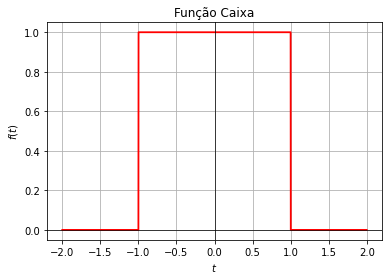

In [12]:
t = np.arange(-2,2,0.001)

f = rect(t)

plt.figure(figsize=(8,8))
fig, ax = plt.subplots()

ax.plot(t,f,"r",linewidth=1.8)
ax.set_title("Função Caixa")
ax.set_xlabel("$t$")
ax.set_ylabel("$f(t)$")

ax.grid(True, which='both')
ax.axhline(y=0, color='k', linewidth=0.7)
ax.axvline(x=0, color='k', linewidth=0.7)

plt.show()

Vamos usar a biblioteca ``scipy`` para calcular a transformada de Fourier da nossa função, com o módulo ``fft``. Clique aqui para a [documentação](https://docs.scipy.org/doc/scipy/tutorial/fft.html). O ``numpy`` possui um módulo para o cálculo da transformada de Fourier, porém sua documentação recomenda usar o módulo do ``scipy``. O fast-fourier transform (fft) é um cálculo matemático que agiliza muito as contas; no entanto, requer que façamos mais alguns passos no nosso sinal, como aplicar um shift. Uma breve explicação do que é o shift [nesse link](https://dsp.stackexchange.com/questions/40411/tt-fft-vs-tt-fftshift-in-matlab-please-explain). 

Como o fft considera o eixo x como o eixo dos tempos, não faz sentido ter valores negativos de tempo. Assim, caso nossa função possua valores negativos, precisamos aplicar o ``fftshift`` para alterar a posição da componente de frequência = 0; ou seja, posicionar as frequências negativas no local correto, já que temos tempos negativos. 

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<Figure size 576x576 with 0 Axes>

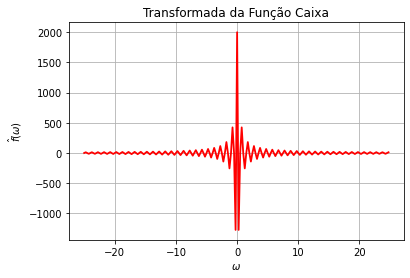

In [13]:
fft_f = fft(f)
fft_shift = fftshift(fft_f) #é preciso aplicar o shift, pois nossa função possui 'tempos' negativos

frq = fftfreq(len(t),d=.001) #fftfreq cria o eixo omega para plotar nossa função 
frq = fftshift(frq) #também é preciso aplicar um shift 

plt.figure(figsize=(8,8))
fig, ax = plt.subplots()

ax.plot(frq[1900:2100],fft_shift[1900:2100],"r",linewidth=1.8)
#ax.plot(freq,fft_shift)
ax.set_title("Transformada da Função Caixa")

#ax.set_xlim(-1.5,1.5)

ax.set_xlabel("$\omega$")
ax.set_ylabel("$\hat{f}(\omega)$")

ax.grid(True, which='both')

plt.show()

*********

#### Exemplo 2: dado sísmico sintético

In [14]:
!git clone https://github.com/GuilhermeZakarewicz/AnaliseSinais

Cloning into 'AnaliseSinais'...
remote: Enumerating objects: 103, done.
remote: Counting objects: 100% (103/103), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 103 (delta 49), reused 77 (delta 29), pack-reused 0
Receiving objects: 100% (103/103), 7.78 MiB | 25.21 MiB/s, done.
Resolving deltas: 100% (49/49), done.


In [15]:
cd AnaliseSinais/Aulas

/content/AnaliseSinais/Aulas


In [16]:
filename = "../Dados/gather_shot40"

with open(filename, 'rb') as file:
    (gather) = np.load(file)

In [17]:
dt=.004
dx=dz=1
nt=nz=120
ntr=80 
nx=ntr
c=250

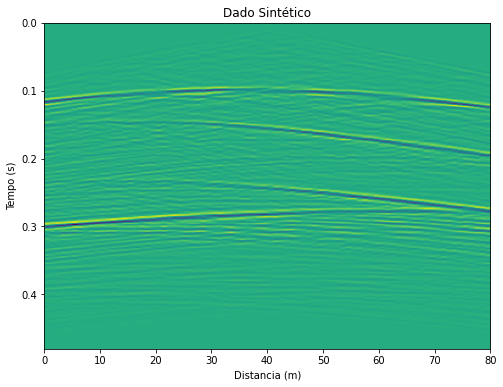

In [18]:
plt.figure(figsize=(8,6))

plt.imshow(gather,aspect='auto',extent=[0, nx*dx, nt*dt, 0])

plt.title("Dado Sintético")
plt.xlabel('Distancia (m)')
plt.ylabel('Tempo (s)')
plt.show()

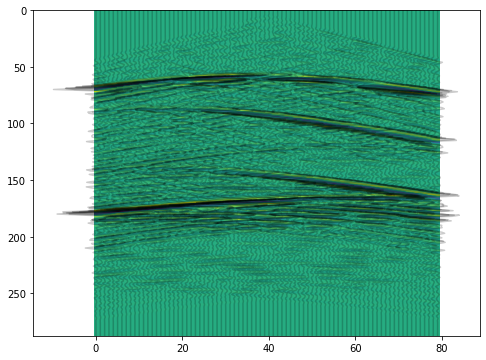

In [19]:
t = np.arange(0,len(gather[:,0]))

plt.figure(figsize=(8,6))

plt.imshow(gather, aspect="auto")

for i in range(len(gather[0])):
    i_trace = gather[:,i]+i
    plt.plot(i_trace,t,"k",alpha=0.2)

plt.show()

Vamos selecionar somente um traço do nosso dado

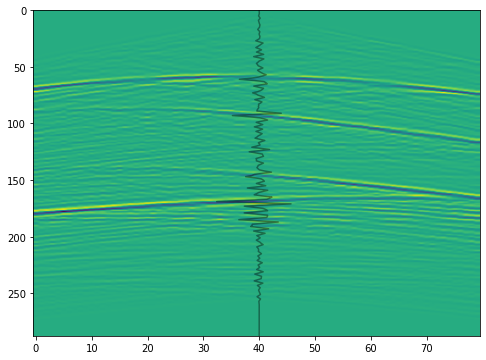

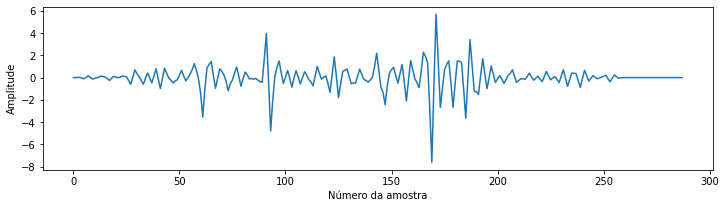

In [20]:
trace = gather[:,40]+40
t = np.arange(0,len(trace))

plt.figure(figsize=(8,6))

plt.imshow(gather, aspect="auto")
plt.plot(trace,t,"k",alpha=.4)
plt.show()

trace = gather[:,40]

plt.figure(figsize=(12,3))

plt.plot(t,trace)
plt.xlabel("Número da amostra")
plt.ylabel("Amplitude")
plt.show()

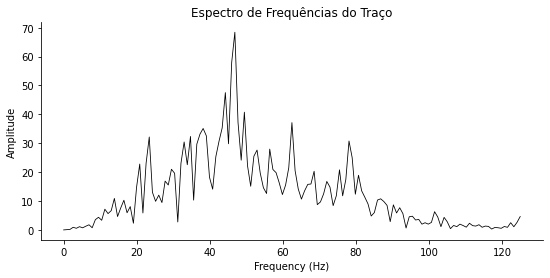

In [21]:
fft_trace = rfft(trace) #transformada do nosso traço
freq = rfftfreq(len(trace),d=dt) #bins de frequência


fig=plt.figure(figsize=(9,4))

ax1=fig.add_subplot(111)
ax1.plot(freq,np.abs(fft_trace),'k',linewidth=.8) 
ax1.set_ylabel('Amplitude')
ax1.set_xlabel('Frequency (Hz)')
ax1.set_title("Espectro de Frequências do Traço")

ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')

plt.show()

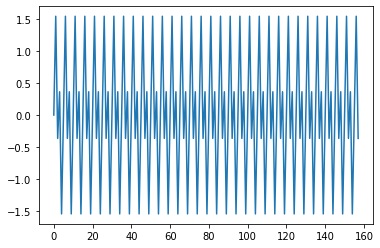

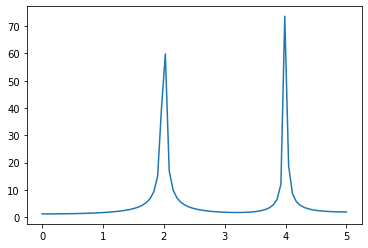

In [38]:
# 2 funções e as suas transformadas de Fourier
t = np.arange(0, 5*np.pi, 0.1)

f1 = np.sin(2*2*np.pi*t)
f2 = np.sin(2*4*np.pi*t)

f = f1+f2
#seno de baixa frequencia e de alta frequencia

plt.plot(f)
plt.show()

fft_f = rfft(f)
freq = rfftfreq(len(t),d=0.1)

plt.plot(freq,np.abs(fft_f))

# a transformada deve aparecer as frequencia dominantes


In [40]:
'''
st = []
for i in range(1000):
  st.append(np.random.randint(-500,500))

print(st)
plt.plot(st)

t = np.arange(0,len(st))

ft_trace = rfft(st) #transformada do nosso traço
freq = rfftfreq(len(st),d=1) #bins de frequência

fig=plt.figure(figsize=(9,4))

ax1=fig.add_subplot(111)
ax1.plot(freq,np.abs(fft_trace),'k',linewidth=.8) 
ax1.set_ylabel('Amplitude')
ax1.set_xlabel('Frequency (Hz)')
ax1.set_title("Espectro de Frequências do Traço")

ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')

plt.show()
'''

'\nst = []\nfor i in range(1000):\n  st.append(np.random.randint(-500,500))\n\nprint(st)\nplt.plot(st)\n\nt = np.arange(0,len(st))\n\nft_trace = rfft(st) #transformada do nosso traço\nfreq = rfftfreq(len(st),d=1) #bins de frequência\n\nfig=plt.figure(figsize=(9,4))\n\nax1=fig.add_subplot(111)\nax1.plot(freq,np.abs(fft_trace),\'k\',linewidth=.8) \nax1.set_ylabel(\'Amplitude\')\nax1.set_xlabel(\'Frequency (Hz)\')\nax1.set_title("Espectro de Frequências do Traço")\n\nax1.spines[\'right\'].set_color(\'none\')\nax1.spines[\'top\'].set_color(\'none\')\n\nplt.show()\n'